In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
%cd '/content/drive/MyDrive/GradPaper/planning_ilqr_learning/quadrotor/Local_Learning_CiLQR-main/Local_Learning_CiLQR-main'

/content/drive/MyDrive/GradPaper/planning_ilqr_learning/quadrotor/Local_Learning_CiLQR-main/Local_Learning_CiLQR-main


In [3]:
!pip install loguru
!pip install torch==2.1.2 torchvision==0.16.2 torch_optimizer==0.1.0
!pip install sympy==1.6

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.5/62.5 kB 4.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 53.5/53.5 kB 4.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 670.2/670.2 MB 1.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.8/6.8 MB 96.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 72.5/72.5 kB 5.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 410.6/410.6 MB 2.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 14.1/14.1 MB 101.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 23.7/23.7 MB 80.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 823.6/823.6 kB 46.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 731.7/731.7 MB 1.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 121.6/121.6 MB 19.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.5/56.5 MB 38.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 124

In [4]:
%matplotlib inline

In [8]:
!python "main.py"

 - INFO: [+] The folder "QuadCopter_3" exits! Remove it successfully!
 - INFO: [+ +] Generated Random Trajectory:
 - INFO: Shape: (100, 16, 1)
 - INFO: Sample Trajectory (First 5 Rows):
[[[ 0.00000000e+00]
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [ 1.37475746e-01]
  [ 8.82382657e-02]
  [ 2.16893921e-01]
  [-1.03231888e+00]]

 [[ 0.00000000e+00]
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [ 1.47427738e-02]
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [-1.51550762e-01]
  [-1.07409827e-02]
  [-1.29070723e-03]
  [-1.02465468e+00]
  [ 1.93000451e+00]
  [ 1.53502990e+00]
  [-9.88152213e-01]]

 [[ 0.00000000e+00]
  [ 0.00000000e+00]
  [ 2.94855475e-04]
  [ 3.16703756e-06]
  [-4.46855719e-05]
  [-2.15629142e-02]
  [-3.03101524e-03]
  [-2.14819654e-04]
  [-2.5814

Last state for No Noise: Position = [[0.98970234]
 [0.96945268]
 [1.0014744 ]]
No collision detected for No Noise.
Last state for Noise 0.005: Position = [[0.90035981]
 [0.8970967 ]
 [0.87815422]]
No collision detected for Noise 0.005.


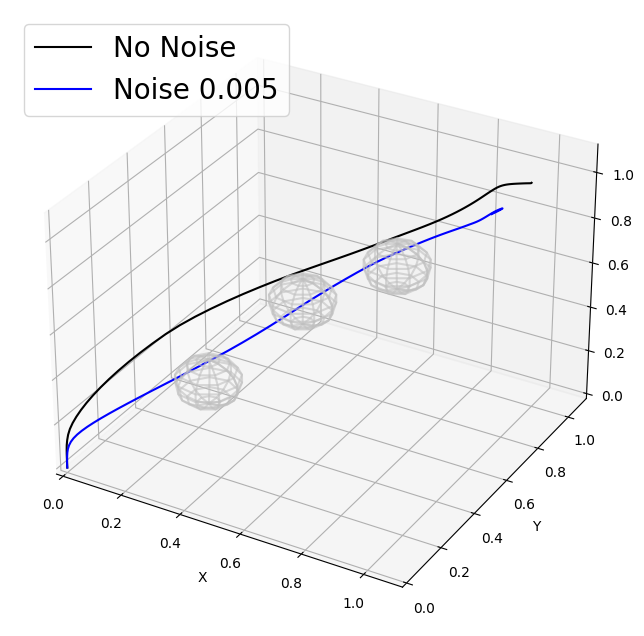

In [ ]:
from ilqr_solver import LogBarrieriLQR, NNiLQR
from scenario.car_parking import CarParking
from scenario.quadcopter import QuadCopter
from scenario.robotic_arm_tracking import RoboticArmTracking
from utils.Logger import logger
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import matplotlib as mpl
import math

scenario = QuadCopter()
#한 step당 평균 0.01씩 이
#zero mean, multiple variance. 0.001, 0.005, 0.01
#scenario.play_with_multiple_noise("QuadCopter_0")
#각각 no noise/bias 0.0005/bias 0.0005 + noise 0.001/bias 0.002 + noise 0.001
#scenario.play_with_bias("QuadCopter_0")
#scenario.play("QuadCopter_0")

#noisy train
#scenario.plot_noisy_train(["QuadCopter_0", "QuadCopter_1", "QuadCopter_2", "QuadCopter_3"])
scenario.plot_noisy_train(["QuadCopter_0", "QuadCopter_2"])
#scenario.plot_noisy_train(["QuadCopter_0", "QuadCopter_5", "QuadCopter_6", "QuadCopter_7", "QuadCopter_8"])

# noisy train + noisy simulation
#scenario.play_with_multiple_noise("QuadCopter_7")
#scenario.play_with_bias("QuadCopter_8")

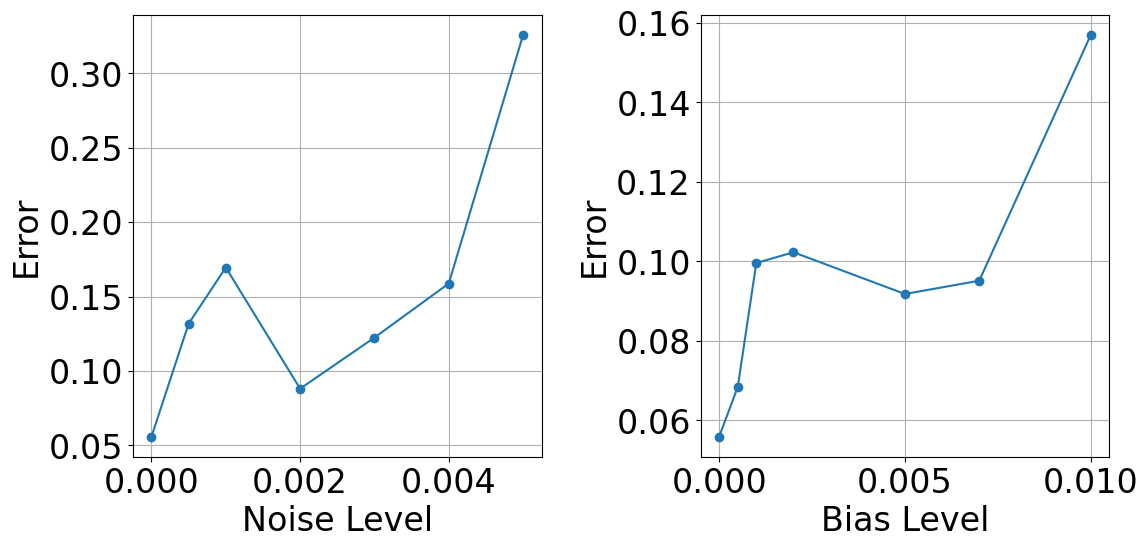

In [ ]:
### Final position error plot하기-noisy training
import numpy as np
import matplotlib.pyplot as plt
from ilqr_solver import LogBarrieriLQR, NNiLQR
from scenario.car_parking import CarParking
from scenario.quadcopter import QuadCopter
from scenario.robotic_arm_tracking import RoboticArmTracking
from utils.Logger import logger

def calculate_final_position_error(folder_name, desired_position):
    trajectory = np.asarray(logger.read_from_json(folder_name)["trajectory"])
    final_position = trajectory[-1, :3]
    error = np.linalg.norm(final_position - desired_position)
    return error

desired_position = np.array([1.0, 1.0, 1.0])

# Noise 없는 경우
error_no_noise = calculate_final_position_error("QuadCopter_0", desired_position)

# Noise 있는 경우
errors_noise = [
    calculate_final_position_error("QuadCopter_0", desired_position),
    calculate_final_position_error("QuadCopter_11", desired_position),
    calculate_final_position_error("QuadCopter_1", desired_position),
    calculate_final_position_error("QuadCopter_3", desired_position),
    calculate_final_position_error("QuadCopter_9", desired_position),
    calculate_final_position_error("QuadCopter_10", desired_position),
    calculate_final_position_error("QuadCopter_2", desired_position)
]

# Bias 있는 경우
errors_bias = [
    calculate_final_position_error("QuadCopter_0", desired_position),
    calculate_final_position_error("QuadCopter_5", desired_position),
    calculate_final_position_error("QuadCopter_6", desired_position),
    calculate_final_position_error("QuadCopter_7", desired_position),
    calculate_final_position_error("QuadCopter_8", desired_position),
    calculate_final_position_error("QuadCopter_12", desired_position),
    calculate_final_position_error("QuadCopter_13", desired_position)
]

def plot_errors(noise_levels, errors_noise, bias_levels, errors_bias):
    plt.figure(figsize=(12, 6))

    # Noise에 따른 오차
    plt.rcParams.update({'font.size': 24})
    plt.subplot(1, 2, 1)
    plt.plot(noise_levels, errors_noise, marker='o')
    plt.xlabel('Noise Level')
    plt.ylabel('Error')
    plt.grid(True)

    # Bias에 따른 오차
    plt.subplot(1, 2, 2)
    plt.plot(bias_levels, errors_bias, marker='o')
    plt.xlabel('Bias Level')
    plt.ylabel('Error')
    plt.grid(True)

    plt.tight_layout()
    plt.show()

# Noise와 Bias 수준
noise_levels = [0.0, 0.0005, 0.001, 0.002, 0.003, 0.004, 0.005]
bias_levels = [0.0, 0.0005, 0.001, 0.002, 0.005, 0.007, 0.01]

plot_errors(noise_levels, errors_noise, bias_levels, errors_bias)

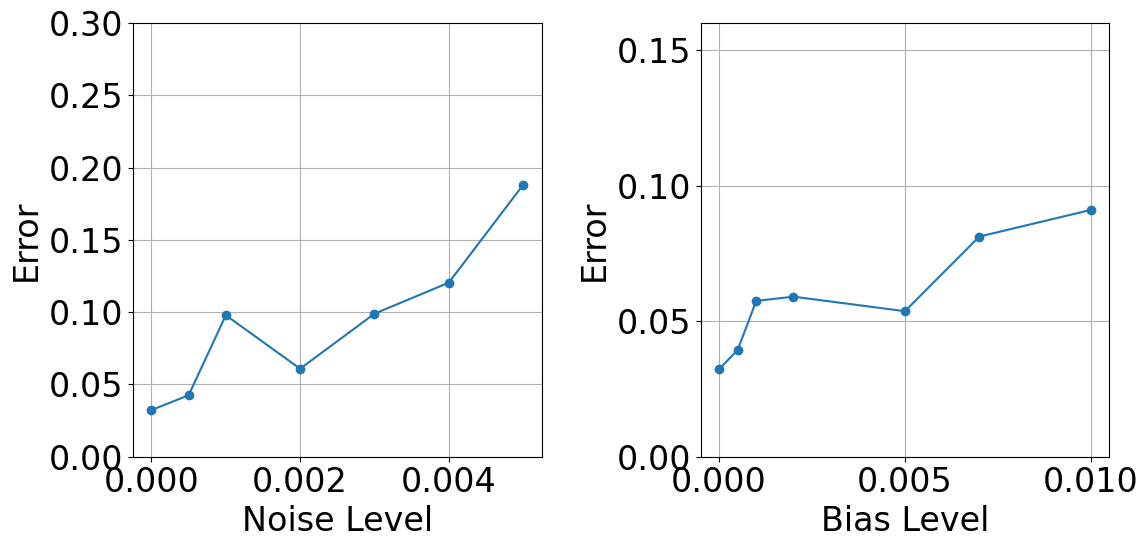

In [ ]:
#Final position error plot - noisy training
noise_levels = [0.0, 0.0005, 0.001, 0.002, 0.003, 0.004, 0.005]
bias_levels = [0.0, 0.0005, 0.001, 0.002, 0.005, 0.007, 0.01]
errors_noise = [0.0322733, 0.042538, 0.0978685, 0.06086893, 0.09893, 0.1204, 0.188052]
errors_bias = [0.0322733, 0.0394, 0.057479, 0.05905, 0.053679, 0.0812, 0.09104]
plt.figure(figsize=(12, 6))

# Noise에 따른 오차
plt.rcParams.update({'font.size': 24})
plt.subplot(1, 2, 1)
plt.plot(noise_levels, errors_noise, marker='o')
plt.xlabel('Noise Level')
plt.ylabel('Error')
plt.ylim(0, 0.3)
plt.grid(True)

# Bias에 따른 오차
plt.subplot(1, 2, 2)
plt.plot(bias_levels, errors_bias, marker='o')
plt.xlabel('Bias Level')
plt.ylabel('Error')
plt.ylim(0, 0.16)
plt.grid(True)

plt.tight_layout()
plt.show()


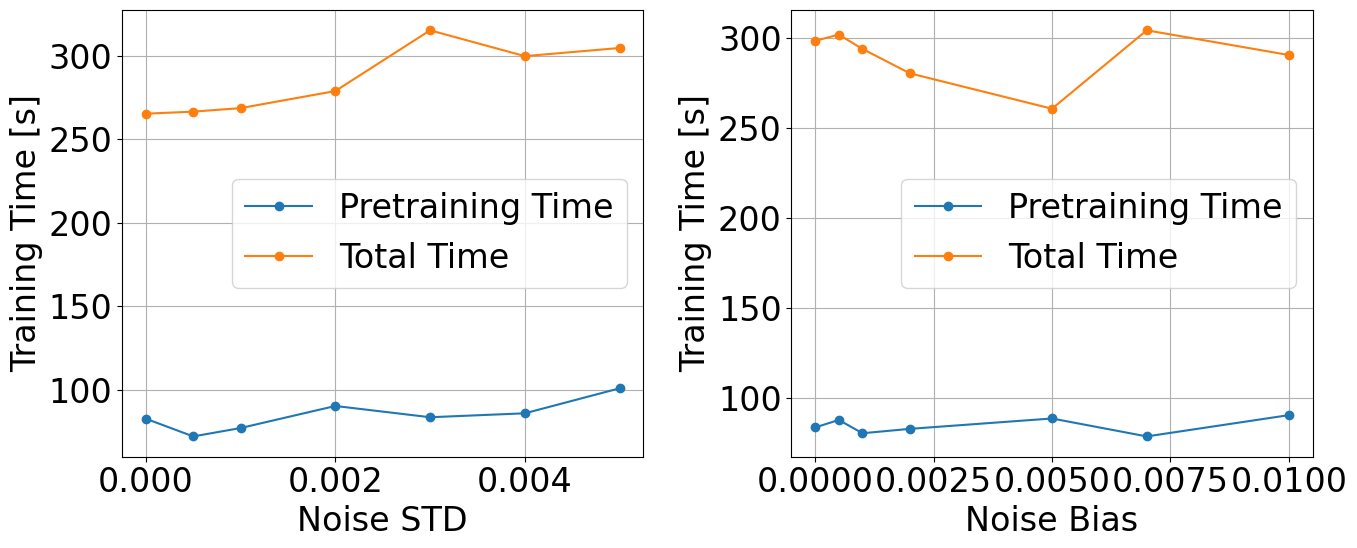

In [ ]:
##training time plot
import matplotlib.pyplot as plt

# 데이터 설정
noise_std = [0, 0.0005, 0.001, 0.002, 0.003, 0.004, 0.005]
pretrain_time_std = [82.6, 71.99, 77.01150, 90.23277, 83.486626, 85.84147, 100.819]
total_time_std = [265.413, 266.66, 268.76, 279, 315.4, 299.92, 304.8]

noise_bias = [0, 0.0005, 0.001, 0.002, 0.005, 0.007, 0.01]
pretrain_time_bias = [83.69, 87.87, 80.48, 82.92, 88.68, 78.72, 90.54]
total_time_bias = [298.41, 301.89, 293.91, 280.38, 260.72, 304.27, 290.54]

# 첫 번째 그래프
plt.figure(figsize=(14, 6))
plt.rcParams.update({'font.size': 24})
plt.subplot(1, 2, 1)
plt.plot(noise_std, pretrain_time_std, marker='o', label='Pretraining Time')
plt.plot(noise_std, total_time_std, marker='o', label='Total Time')
plt.xlabel('Noise STD')
plt.ylabel('Training Time [s]')
plt.legend()
plt.grid(True)

# 두 번째 그래프
plt.subplot(1, 2, 2)
plt.plot(noise_bias, pretrain_time_bias, marker='o', label='Pretraining Time')
plt.plot(noise_bias, total_time_bias, marker='o', label='Total Time')
plt.xlabel('Noise Bias')
plt.ylabel('Training Time [s]')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()

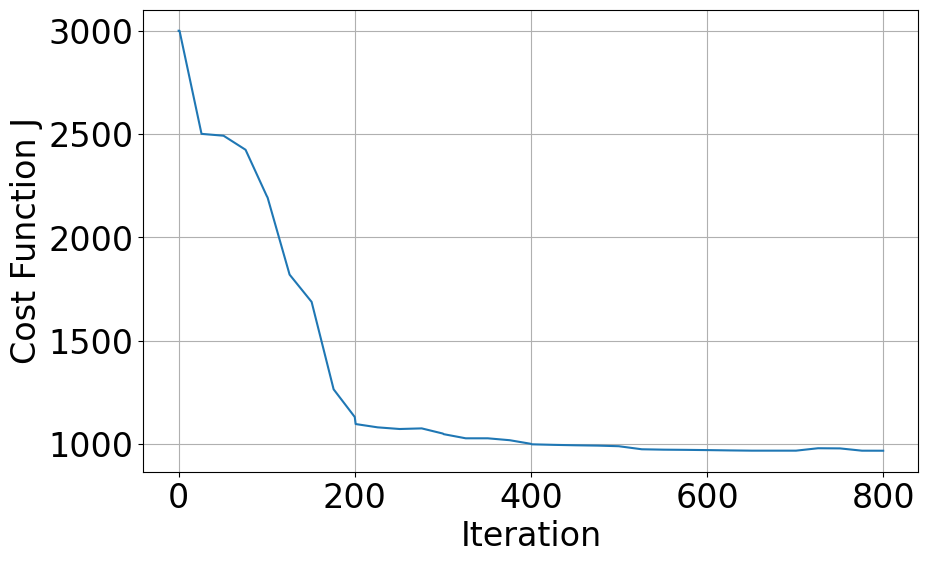

In [ ]:
import matplotlib.pyplot as plt

# 주어진 점 좌표
iterations = [0, 1, 26, 51, 76, 100, 101, 126, 151, 176, 200, 201, 226, 251, 276, 300, 301, 326, 351, 376, 400, 401, 426, 451, 476, 500, 501, 526, 551, 576, 600, 601, 626, 651, 676, 700, 701, 726, 751, 776, 800]
#obj_vals = [3000, 3000, 2367, 2251, 2010, 1834, 1888, 1808, 1282, 1056, 1086, 1067.11, 1037.56, 1037.56, 1044.28, 1041.62, 1041.62, 1025.7, 1010.81, 1010.81, 1010.81, 1010.8, 1010.8, 1010.8, 1010.8, 1010.8, 1007.11, 1007.11, 1004.55, 1004.55, 1004.55, 1044.55, 1004.55, 1004.55, 1002.4, 1002.4, 1000.73, 1000.73, 1000.64, 1000.64, 1000.64]
obj_vals = [3000, 3000, 2501, 2492, 2424, 2201, 2193, 1820, 1688, 1265, 1131, 1097, 1081, 1073, 1076, 1051, 1048, 1028, 1028, 1018.74, 1001.3, 998.98, 996.3, 994.2, 992.6, 989.7, 989,  974.9, 973, 972.12, 970.93, 970.93, 969.39, 968.21, 968.211, 968.2, 968.2, 979.9, 979.12, 968.08,967.92]
# 그래프 그리기
plt.figure(figsize=(10, 6))
plt.rcParams.update({'font.size': 24})
plt.plot(iterations, obj_vals, linestyle='-')
plt.xlabel('Iteration')
plt.ylabel('Cost Function J')
plt.grid(True)
plt.show()

Last state for Learned dynamics: Position = [[0.98970234]
 [0.96945268]
 [1.0014744 ]]
No collision detected for Learned dynamics.
Last state for Model-Based dynamics: Position = [[0.9892533 ]
 [0.98921099]
 [0.99409556]]
No collision detected for Model-Based dynamics.


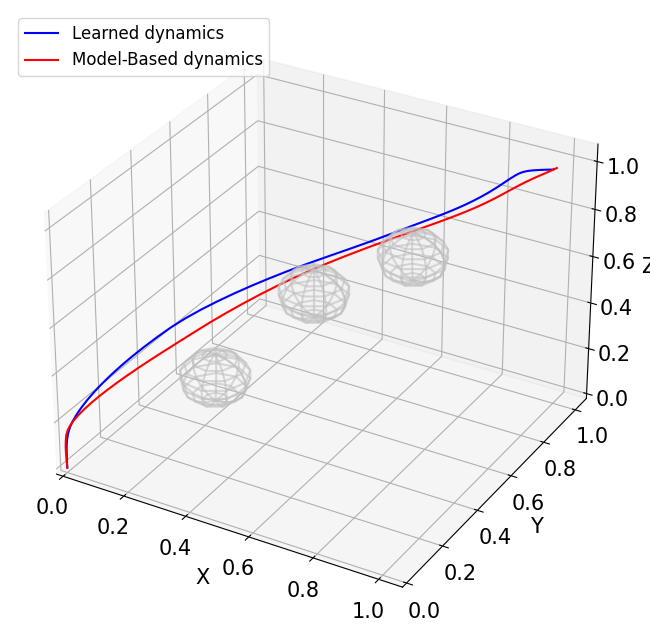

In [ ]:
##model-based와 비교하기
from ilqr_solver import LogBarrieriLQR, NNiLQR
from scenario.car_parking import CarParking
from scenario.quadcopter import QuadCopter
from scenario.robotic_arm_tracking import RoboticArmTracking
from utils.Logger import logger
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import matplotlib as mpl
import math

scenario = QuadCopter()
plt.rcParams.update({'font.size': 15})
scenario.plot_model(["QuadCopter_0", "QuadCopter_model_based"])

In [ ]:
#import numpy as np

# trajectory = [[[0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [-1.996562148786241], [-1.9946142105625349], [-1.5536370482754698], [1.749323616925769]], [[0.0], [0.0], [0.0], [0.0], [0.0], [0.09488724476746194], [0.0], [0.0], [0.0], [0.5063522471603024], [-0.05990380457727634], [0.003285200432854061], [-1.995322363760574], [-1.996484011455506], [-1.8673575138832683], [1.8111787457326447]], [[0.0], [0.0], [0.0018977448953492388], [0.00011368213934852455], [0.0009609273922970799], [0.19608687335162958], [0.010127044943206048], [-0.001198076091545527], [6.570400865708122e-05], [1.0213261270122158], [-0.07718434689876952], [0.0069406457466305565], [-1.9942459280716038], [-1.9956293819358215], [-1.8789621633657152], [0.47249176053374264]], [[-2.4235430946842256e-06], [-2.049752966004518e-05], [0.005819475796377092], [0.0006515747465092131], [0.006953175379951708], [0.3309655107142123], [0.03055341991266098], [-0.0027430896128162975], [0.00018887717414192617], [1.355137827114093], [-0.09266444431676596], [0.00927670203496375], [-1.9935960869658909], [-1.9949446989944033], [-1.6621610140601595], [-1.7301563523608634]], [[-7.540674834386423e-06], [-8.371099335723029e-05], [0.012439955693250414], [0.0018044330070909026], [0.021916757963770368], [0.5152049985843142], [0.05765582305648827], [-0.004601181350756688], [0.00031770960313531193], [1.3909628942509504], [-0.1372918375959032], [0.009207771603604385], [-1.9928893738434732], [-1.9940424172774505], [1.3014830002216144], [-1.8974413194853093]], [[-1.88510886242546e-05], [-0.0002398700627377334], [0.022752249460853392], [0.004125886512689805], [0.04755473298172646], [0.6288345022171326], [0.08547496304161031], [-0.007353067271331317], [0.00034333352533916375], [1.404047691670515], [-0.5826406363523482], [0.006026777270610657], [-1.991839000818236], [-1.992841569885742], [0.89736807097555], [-1.9050690454361447]], [[-2.9028145810241276e-05], [-0.0003659347423289207], [0.0353644866463382], [0.012901968037379202], [0.08196183027753734], [0.7515390164213721], [0.11356234883551344], [-0.01897362859302071], [-0.0005314059834906138], [1.4159738279695233], [-0.9732608811866478], [0.0032400553447237655], [-1.9903193037765676], [-1.9911868161582889], [0.12026927858738579], [-1.8958403538301285]], [[-5.79335752725883e-05], [-0.00044050576829174], [0.050486379447186515], [0.03125855233936753], [0.12547325700701698], [0.8915948247506905], [0.14192246009407983], [-0.03832080852417233], [-0.002673175395252767], [1.428918673814809], [-1.2586371350272387], [0.001235106045283426], [-1.9880611968533468], [-1.9887464003637807], [-0.34547384396406733], [-1.8673949292942735]], [[-0.00012321859577791683], [-0.00047835611828885146], [0.06850467825571196], [0.06122224153534958], [0.1786842452382204], [1.0398488420993277], [0.1706364077888597], [-0.06324395599268418], [-0.006211916116771739], [1.4453554279893064], [-1.480762567648353], [-0.0002784204812843107], [-1.9846170427171839], [-1.984878451570813], [-0.19715732490794588], [-1.8006573877677046]], [[-0.00023495101673262262], [-0.00048740355870504444], [0.08964166405591632], [0.10441682530441429], [0.24199363525019388], [1.178817255052534], [0.19986233943999115], [-0.09242815647114876], [-0.0112564412978929], [1.470264083607896], [-1.72251550194045], [-0.0018726182377994073], [-1.9791825054157384], [-1.9782887083115204], [0.172804200606807], [-1.6685914245204037]], [[-0.0003761992811506052], [-0.00042299558061554676], [0.11379959165799546], [0.1631269770518063], [0.31544718476409894], [1.2997092619862394], [0.22990499896041952], [-0.12618526021246765], [-0.018162197010991237], [1.512098608229054], [-2.0136062140435618], [-0.003702144596205748], [-1.970001181370244], [-1.9662874990433115], [0.5943730103215338], [-0.24994459095395188]], [[-0.0005018421919195278], [-0.00020141964063376348], [0.14074545811365027], [0.24013757244820647], [0.3991205874053769], [1.3667152467635035], [0.2613203572351685], [-0.16538087305490626], [-0.027485836070552647], [1.7441096330950794], [-2.360515413532756], [-0.0045377357394908455], [-1.954847400832383], [-1.947955826643474], [0.6203360876357138], [1.3832515282590372]], [[-0.0004335221690494207], [0.0004463638051439688], [0.1696162955464826], [0.33692441586597444], [0.49681429148701], [1.3796892960337666], [0.2982529407925739], [-0.21096493003471603], [-0.03994052577019452], [2.1944732025802645], [-2.7089229793709984], [-0.003772519316968778], [1.671958553875838], [1.8105867738686845], [0.06034116199371142], [1.630137663212698]], [[7.612759756025524e-05], [0.0018162639473492791], [0.19967320245728745], [0.4527213451860275], [0.6137688308391706], [1.1974849153207148], [0.34556722121431527], [-0.26272931111602454], [-0.05629562878010298], [2.16990736899651], [-2.491088619728669], [-0.0020742824495990344], [1.9034801849174048], [1.9257411932582473], [-0.2654371501323217], [1.3749705656685232]], [[0.0020780278088859015], [0.005146107856043186], [0.22780077081458744], [0.5633132122414353], [0.7299345920714747], [1.0068909267833457], [0.39351464162297484], [-0.30959174070184325], [-0.07381188705634037], [2.0953365786659632], [-2.197822274590663], [-0.0004215287224361745], [1.9469471345548899], [1.9522901997850262], [-0.2049352007751149], [0.5910084391097109]], [[0.005852509051225102], [0.010644020694133248], [0.254279224218568], [0.6673426217265745], [0.8437885497060844], [0.8207968243777292], [0.4408152434780598], [-0.3501852360545526], [-0.09151587369820773], [1.9112142194368116], [-1.906802908169295], [0.0003749796674647987], [1.9609582143619537], [1.9628470257721926], [0.15004781073911647], [-0.9962968997300403]], [[0.011559469793886147], [0.0184131988785416], [0.27956723633378305], [0.7659615938180913], [0.953791255134956], [0.656629750811776], [0.4849801283382562], [-0.3846788440138884], [-0.10883178350376552], [1.511013383804586], [-1.6618734191577877], [-0.0007626514945813822], [1.9666508935266218], [1.9676375148923853], [0.27608967166827375], [-1.5643704479325091]], [[0.019191676845795723], [0.02839706543012458], [0.3043281499818681], [0.8613980567096837], [1.0584286230785658], [0.5008871133077898], [0.5214789821737911], [-0.4140763967595898], [-0.12556301399950182], [1.0333038358317603], [-1.4332500781941735], [-0.002591155655441605], [1.9692603954438346], [1.9698424439475175], [0.032978101147320686], [-1.7382679371371241]], [[0.028836360008096466], [0.04065014162334597], [0.3288660487410355], [0.9546411370515422], [1.1583040940440659], [0.35802072286303843], [0.5484406033747521], [-0.43890552609480227], [-0.14121016125073935], [0.5317386576836919], [-1.171417970408742], [-0.00435126063977872], [1.9701766516289791], [1.969992103017516], [-0.8209855610216126], [-1.8014053123187148]], [[0.04055225778140308], [0.055181244897309384], [0.3534436715337042], [1.0463031640398157], [1.2547895693089204], [0.24574832887208573], [0.5648442844342716], [-0.45885247740072826], [-0.15478569181022112], [0.021592396443775086], [-0.7939611331920995], [-0.005326017299366729], [1.9699436884880237], [1.969238891055587], [-1.1877261709419733], [-1.824795024917106]], [[0.05425628301995506], [0.07183442028758816], [0.37847819185804016], [1.136972616352035], [1.3491665116186833], [0.1578077408993477], [0.5695197047735031], [-0.47220819290711097], [-0.16436660142812723], [-0.49160169062959946], [-0.36690103583341904], [-0.00595998771340352], [1.968685729081865], [1.9668479805191397], [-1.452664011265277], [-1.8213602945473486]], [[0.06995247197189496], [0.09054060760753907], [0.4041463106853734], [1.2272121344340288], [1.4419692035566696], [0.09714176373327973], [0.5617598985631747], [-0.4783237050791414], [-0.16892241032765345], [-1.0039757484318526], [0.09586860515508033], [-0.0063283121386364], [1.966506307615996], [1.962342591109924], [-1.6258981571725242], [-1.7937404096665008]], [[0.0876448431007869], [0.11123310437978863], [0.4305414828355161], [1.3171525970574367], [1.5329555708581044], [0.06693043564152265], [0.5412063750670775], [-0.4766335778463372], [-0.16789260995058983], [-1.5119610326516235], [0.581826575114823], [-0.006499292383968101], [1.964245988400199], [1.9539321774650977], [-1.8199408805140729], [-1.7319220854679322]], [[0.10733504094320717], [0.1338487094575582], [0.45768111967248937], [1.4061892052976546], [1.6209137484597578], [0.0726732171224703], [0.5079293297105685], [-0.46659308361611335], [-0.16127123424259468], [-2.0103982042353965], [1.0937769895130867], [-0.006422050778202678], [1.9582455136133754], [1.9408805519114598], [-1.8547112392636138], [-1.6437442911842233]], [[0.12899677442919782], [0.15830644381578238], [0.485548535689333], [1.4926510650736056], [1.703397504298858], [0.11549680300705925], [0.46241886855707126], [-0.4474167846453891], [-0.14948387783160402], [-2.495093476953877], [1.6096669510772346], [-0.006229603299083418], [1.9512031898357454], [1.9217887485136713], [-1.8472353739036336], [-0.8143723225467823]], [[0.15261205890014556], [0.18454154688124566], [0.5140301370310668], [1.5736041903160225], [1.776732040361518], [0.18037848558466332], [0.40567861622153883], [-0.41854893575880353], [-0.13367763284833467], [-2.8649902368417752], [2.123634817564171], [-0.0052321385569066466], [1.9367676995961693], [1.8918205475577745], [-1.7606825043000882], [0.4398972985666978]], [[0.17828881946264033], [0.21259640952409903], [0.5426630894590406], [1.6454996689311363], [1.8373062080037685], [0.2548389771035967], [0.34096549812242816], [-0.3794822479119969], [-0.11543778632635608], [-3.061182041737365], [2.6239357127607623], [-0.0030893605961978747], [1.9168306603234446], [1.8393337783523516], [-1.6740854453915017], [0.9122945152574732]], [[0.20615743609232343], [0.24251194632473233], [0.5707294987724326], [1.7046927748891632], [1.882746801934072], [0.354370334962965], [0.27276642613540264], [-0.33000395395299026], [-0.09660764203040373], [-3.1864327284304585], [3.1097412321627083], [-0.0005954387468882565], [1.8859731564127613], [1.7316317643014465], [-1.4857345504936421], [1.3101350634767515]], [[0.23610160623178797], [0.27412449818498763], [0.5978313393749284], [1.7462083289171018], [1.9101871407926378], [0.4768791953795587], [0.20330259594823658], [-0.27010530629910307], [-0.07890903748554715], [-3.2434092888861668], [3.5657807405966135], [0.002030337242455148], [1.8144834986376708], [1.3754909282390329], [-1.0184789495523798], [1.4835190860891483]], [[0.2679158712806899], [0.3072108795825845], [0.6235865871612907], [1.7646295825404714], [1.9173594227759738], [0.6229382516398089], [0.13443673162264425], [-0.20026662745948545], [-0.06392708378716519], [-3.2289128601267434], [3.948823665047154], [0.004081040381529157], [1.5850875783172766], [0.5012374940611715], [1.6819319855935169], [1.448757516065964]], [[0.3012819970105132], [0.3414806399346829], [0.6477439854733544], [1.7546188036264232], [1.9027586475231686], [0.7500405678801885], [0.06769335339371661], [-0.12201369991532561], [-0.053043284963307236], [-3.1010182784045073], [3.9355184750332404], [0.0027718696438919165], [1.0836523347569518], [-0.1345660893074104], [1.8060443739263787], [1.6995765326730148]], [[0.3358918179550936], [0.3766484789852858], [0.6694252856831397], [1.7195680512532205], [1.8693162159636458], [0.8928847128715648], [0.00501334932057531], [-0.04348735224551464], [-0.04762358157354188], [-2.8531296843567646], [3.8376826370522306], [0.0014550828838260856], [-0.44333127708352105], [0.4917588809343291], [1.860215125612545], [1.806528639611524]], [[0.3712036340643377], [0.41230419347835595], [0.6889482432077995], [1.65961981774525], [1.819298541184092], [1.0384686335822462], [-0.05206725481271569], [0.03326519005084183], [-0.04720929734559727], [-2.675400344543308], [3.5260720911373977], [0.002331230478899695], [-1.2918234830005542], [1.0896184909273072], [1.8882213538098582], [1.8542774919850789]], [[0.4067326614876168], [0.4480849577051147], [0.7066814327528755], [1.5799449098456144], [1.7534494440572679], [1.1639728219257175], [-0.1056958471796609], [0.10369348820613895], [-0.05083494079456662], [-2.5721127137979614], [3.095885904260033], [0.004664729749049868], [-1.3256887566395406], [1.306800249154276], [1.9003122343137568], [1.8738138924637828]], [[0.44202864684949], [0.48366667181215833], [0.7227560238523856], [1.4877297329587482], [1.6728369043256883], [1.2559769633439546], [-0.15780823853674122], [0.16527551029289572], [-0.05730920956976669], [-2.495653717977154], [2.659393667249691], [0.0072551801016949614], [-1.1177205333130569], [1.2606622608983944], [1.9021074819259922], [1.8849096108459356]], [[0.47665931493123], [0.5187293104931844], [0.7371438199531731], [1.388890096889997], [1.5795178992801766], [1.3152752617779195], [-0.20909161544849195], [0.21782528002914148], [-0.06563809639638193], [-2.411530471546815], [2.2506893510819914], [0.009602284564275572], [-0.8806694304392726], [1.043836084216329], [1.8960178047662393], [1.8908222233459713]], [[0.5102423661690055], [0.5529628703592272], [0.7498630436838579], [1.2875877608408794], [1.4760514903025097], [1.3464168669603005], [-0.2593487230838903], [0.2618985242399825], [-0.07501539575607745], [-2.2973191869797778], [1.8747893569148486], [0.011510149071303538], [-0.7594205123417459], [0.5275971313366792], [1.8835928488103704], [1.8952613477233102]], [[0.542467429120295], [0.5860804649033442], [0.7610232273206788], [1.1866435078445798], [1.3652921473762263], [1.3608113220435125], [-0.3078130406214792], [0.2981993832207111], [-0.08474034688219977], [-2.112687812481199], [1.5169164877942067], [0.012801090755246422], [-0.7611867027936106], [-0.18822851002224783], [1.8673410362077312], [1.9003680502024876]], [[0.573142987026938], [0.6178664428473346], [0.7709349839712338], [1.088064841300724], [1.2506686446085278], [1.366569871247932], [-0.3528170240014432], [0.3271893324940893], [-0.094101243737843], [-1.8305192852082353], [1.160993262108156], [0.013403462288761183], [-0.254041982481863], [-0.7418010541547213], [1.8522471569456587], [1.9052144576310486]], [[0.6021924366390368], [0.6481878249517259], [0.7800438484837491], [0.9936132449689229], [1.1361474359340737], [1.34672886564064], [-0.3920650942037258], [0.34907155388699596], [-0.10230854350135693], [-1.472766185273766], [0.8757401590813229], [0.012971263312738316], [0.7793602297728323], [-1.482225042475535], [1.854765808486676], [1.9033004157075915]], [[0.6294789845157425], [0.6768412872328214], [0.7884779560240206], [0.9032148956409352], [1.02577502135051], [1.2953952412787664], [-0.4238690227121496], [0.3653564939693319], [-0.10917529695514025], [-1.0150665139284931], [0.7299953145426838], [0.01077140973883259], [0.3847991836516289], [-1.3729927536795723], [1.931657483440173], [1.879377104801724]], [[0.6548393841799899], [0.7035929632159988], [0.796199491510277], [0.814424443783521], [0.9239132333257204], [1.2296689559270801], [-0.44639225707520236], [0.3787529773927328], [-0.11539420060900084], [-0.5753205667649539], [0.5206169977771788], [0.00897213143208661], [-1.8316966728108293], [0.5904204033770143], [1.8076839009983208], [1.8972087127853623]], [[0.678232301201949], [0.7283490819583682], [0.80337594254295], [0.7292391749367646], [0.8309188547182632], [1.1554211876054208], [-0.4596231789566391], [0.3882224851007779], [-0.1200580384489989], [-0.3986563151214423], [0.028324454964123114], [0.011468795639078159], [-1.6485793433176104], [-0.6423888253883797], [1.758500633943076], [1.8931787550002714]], [[0.6996588813635342], [0.7510913853425238], [0.8102005241876155], [0.6545049453993033], [0.7409798519015404], [1.0949945526497546], [-0.46761500754362323], [0.38883193735028737], [-0.12010744431895054], [-0.05573630389658685], [-0.43254110300139537], [0.012602860932969712], [-1.488334832877715], [-1.0294235468659008], [1.6764825631655875], [1.884264136381801]], [[0.7192959252190311], [0.771989266809453], [0.8171461294697338], [0.5897833665512523], [0.6577571570385474], [1.0299474043219616], [-0.4670399951305509], [0.38122343362681377], [-0.1156502992221859], [0.3384138041681288], [-0.8605807399976027], [0.013265578100835371], [-1.3292544797713204], [-1.0695875558792474], [1.5330389019912998], [1.866593046551135]], [[0.7372057979059942], [0.7910709360592115], [0.8243321283624276], [0.534687479035952], [0.5825753101974831], [0.9567358794036992], [-0.4570705358290377], [0.36597455325945716], [-0.10704627134071767], [0.7356998603489218], [-1.2476235386038643], [0.013855261612457061], [-1.1473658276757486], [-0.9655807303671231], [1.2601525049192217], [1.837321003670307]], [[0.7534333789313593], [0.8083360016815163], [0.8317371548454235], [0.48850980815070044], [0.5156515250814476], [0.8784093417533415], [-0.4380409894473163], [0.34370576647907897], [-0.09498693118667978], [1.1150528769113663], [-1.573070106840527], [0.014609689338448528], [-0.9066939209000104], [-0.6873472927756799], [0.6902861379222602], [1.7914775335610713]], [[0.7680527510311451], [0.8238103465115121], [0.8393051883650049], [0.4501813012823251], [0.45674425165137333], [0.8004313235959164], [-0.4108689413127761], [0.3153387519222197], [-0.08053202765384922], [1.4506654605215952], [-1.7887987385159565], [0.015922352594180053], [-0.6305222566111444], [-0.11372846602692743], [-0.22833804631421184], [1.7207505874211126]], [[0.7811817873789999], [0.837567335978263], [0.8469968184316515], [0.41811377991448956], [0.4053245725383392], [0.7271718252258422], [-0.37709892870937606], [0.2826674542417296], [-0.06519467735033062], [1.6992194736332606], [-1.842828995044963], [0.018373530215051816], [-0.4956304316001313], [0.4307976703321775], [-0.78046714449946], [1.6083094126257134]], [[0.7929676441348186], [0.8497174742609952], [0.8547828393939807], [0.3903400337961326], [0.3605047960382005], [0.6578868537897308], [-0.33907353825289543], [0.2485358476344539], [-0.05070655683751854], [1.8590059781771036], [-1.8038146554491166], [0.02166896530504152], [-0.443845036617294], [0.891200312164704], [-1.0541691461072247], [1.4197174485612616]], [[0.8035505433814398], [0.8603707921242795], [0.8625653021774211], [0.36596811947675933], [0.32154233526983217], [0.5932223645002265], [-0.29874443821726687], [0.2146577701658071], [-0.03790504570991685], [1.9311008913011989], [-1.7206368631557856], [0.02545518343415033], [-0.32469420703340734], [1.1936004022493876], [-1.1930850350438824], [1.090271688119274]], [[0.8130727435921502], [0.8696545614803175], [0.8702355886340006], [0.3447530598069105], [0.287847084990093], [0.5360636663073356], [-0.2578081890290472], [0.1819191234900412], [-0.027040776147593235], [1.9178154039294406], [-1.6024169517228737], [0.02923416436874224], [-0.0877638925343362], [1.3812864894048635], [-1.2545446210864508], [0.6092825126036995]], [[0.8216853834950089], [0.877724844055044], [0.877740448488462], [0.3266053232527211], [0.2590089059778508], [0.4881528179250657], [-0.21784478344959024], [0.15107901779686153], [-0.018157728662362156], [1.8141422678494763], [-1.443732294147916], [0.03254716692670958], [0.16169945789305817], [1.4904819762301766], [-1.2674938722424467], [0.22735452604905684]], [[0.829538114058017], [0.8847512185215918], [0.885074247929479], [0.31134009255455686], [0.23458699820606177], [0.4472044424292225], [-0.18051512464414057], [0.12302749499231345], [-0.011202386195019511], [1.644048962212458], [-1.2495105178005463], [0.035353959677321606], [0.4001380341578825], [1.5422547418251895], [-1.2730223638893936], [0.04589592712521601]], [[0.8367634856613029], [0.8908919586759251], [0.8922063952966081], [0.29860454781275697], [0.21411258670071934], [0.4091820414497881], [-0.1469933509961082], [0.09857028849368948], [-0.00598067743492889], [1.4423677805306456], [-1.0223076984730235], [0.037800318779222394], [0.5163119832987785], [1.5537268674942615], [-1.2822839393461767], [0.02411322109492886]], [[0.8434739209615303], [0.8962866074841653], [0.8990506154741355], [0.2878244289111405], [0.19709379986619774], [0.37354549681028215], [-0.11777589757761381], [0.07845535571657006], [-0.002219931559151918], [1.2361019646588842], [-0.7781969206821095], [0.04013015396304235], [0.5167474271740096], [1.5349580873943833], [-1.2730453298592634], [0.0859272197018073]], [[0.8497684990665195], [0.9010650744657791], [0.9055340236974546], [0.27841930167281526], [0.18311426687203888], [0.34062004183365047], [-0.0928474213833981], [0.06309354645537596], [0.00041403561286962234], [1.0406179537947398], [-0.5353541172526994], [0.04249316130964619], [0.39341898029771594], [1.4942939887130484], [-1.2137009846782048], [0.16973950500285706]], [[0.8557303080736909], [0.9053456597431228], [0.9116136194994244], [0.2698512281557585], [0.1718124473650435], [0.31150037351270843], [-0.07191888538880693], [0.05251137622188687], [0.002256601778003771], [0.8618354036750456], [-0.31730182066645773], [0.04496266208229523], [0.18201314952793748], [1.4392617644193981], [-1.0946086072213106], [0.25266792768346574]], [[0.8614243250061907], [0.9092335538822242], [0.9172891040054083], [0.26168452597043507], [0.1628601325313001], [0.2865661203566381], [-0.05461106745590606], [0.0462463621739641], [0.003611404399548511], [0.7015779760043517], [-0.14403411754110962], [0.04755165566009727], [-0.06706135541384955], [1.3767270054503866], [-0.942038232261706], [0.3279836950909218]], [[0.8668958528338878], [0.9128185219656849], [0.9225862097402412], [0.25359461501150904], [0.15593431524645607], [0.2656348743330582], [-0.04052828342953569], [0.043421885505574784], [0.004719443337724168], [0.5598475299037717], [-0.02517205228610761], [0.0502492826759532], [-0.33262521544417456], [1.3120106533315994], [-0.7955513725042686], [0.39118511832268704]], [[0.8721721237220807], [0.9161748412523255], [0.9275431378937445], [0.24536836122823516], [0.15071177732266658], [0.24903984196667675], [-0.02928681659178973], [0.04295957705884099], [0.005744968396398967], [0.4353295564389277], [0.03787954533782541], [0.05306377070497115], [-0.5737437351531925], [1.250908988150992], [-0.6920882465835414], [0.426911216395078]], [[0.8772667566003445], [0.9193629559963744], [0.932218268520309], [0.23691356090786228], [0.1468797106484063], [0.23734876276678832], [-0.020535578628370115], [0.04374792002470477], [0.006784563603481331], [0.3238556015662365], [0.05424870005837933], [0.055989869002069696], [-0.7117200161770523], [1.192708068395004], [-0.6474649667189613], [0.39138203338300737]], [[0.8821847155853938], [0.9224308424140887], [0.9366922153596253], [0.22823991493050574], [0.14412680734511252], [0.2308027730572859], [-0.014010432132044347], [0.044855659332652426], [0.007882896745571088], [0.21543173810141075], [0.04584383398247343], [0.058915592446330524], [-0.7723545559039482], [1.1411375597708018], [-0.5772525332153455], [0.13870048337917718]], [[0.8869266998959828], [0.9254152393822804], [0.9410581431762456], [0.2194003941229258], [0.14210632237170823], [0.2319186936397394], [-0.009649489705923183], [0.04578895414400792], [0.009049420875551112], [0.07981372563904335], [0.01965683250315768], [0.061529357401205534], [-0.8062256325648759], [1.0946200270198556], [-0.44960972862178594], [0.15557089516003147]], [[0.8914948442654219], [0.9283434491526131], [0.9454631917190471], [0.21050343874552288], [0.14031532078845182], [0.2317044502392643], [-0.007997004929269826], [0.04619394684495481], [0.01027744435270835], [-0.047207855200712384], [-0.028496720870123213], [0.06402043949113917], [-0.8257620299224613], [1.0382291625005098], [-0.2553872838188305], [0.1257923342169035]], [[0.8958839150936841], [0.9312319844596727], [0.949875360883676], [0.2017551266581828], [0.13825970301601678], [0.22942958876576583], [-0.008881763994468972], [0.04563426997796834], [0.011563742079041811], [-0.17058248529332454], [-0.10568513123548112], [0.06625222166832449], [-0.8032579033210557], [0.9368391476479997], [-0.04350953594324496], [0.023364555413082404]], [[0.9000902838755279], [0.9340866548478776], [0.9542503858859704], [0.19347293630985526], [0.1354688700688129], [0.22642693843757836], [-0.012232049347695374], [0.043532419300408805], [0.012908907811997161], [-0.29401598670621076], [-0.2086158433789267], [0.06804841729466353], [-0.68087487666987], [0.7692156438872911], [0.08703277474925745], [0.017564033034286095]], [[0.9041156708126699], [0.9369034180825121], [0.9585727932017166], [0.1860636668195336], [0.13147650209912679], [0.22139232784610444], [-0.018050866749497765], [0.03937706158311775], [0.01432214794029614], [-0.3954503744224621], [-0.3127870754094232], [0.06942080600785207], [-0.42775849472917504], [0.5566648620631893], [0.05477521333552515], [0.12876968334206373]], [[0.9079672764268719], [0.9396678867730883], [0.9628025657333001], [0.17990740099038086], [0.12592853219418254], [0.21327290043835248], [-0.025900734550410996], [0.03314739996662611], [0.015824417818392795], [-0.4529797162388698], [-0.37847982091619603], [0.07047291216871135], [-0.10601612432578454], [0.3326013745764881], [-0.1307068244775471], [0.29945493664864087]], [[0.9116605462231432], [0.9423548566419742], [0.9668798136311944], [0.17519695279977496], [0.11866442951076536], [0.2029950534913285], [-0.034907107085331006], [0.025616844353157784], [0.017430321672144394], [-0.45704287100501345], [-0.37564289651479277], [0.07133651063498736], [0.1967062535492055], [0.07286149517333591], [-0.3541989340446004], [0.45125266849302986]], [[0.9152207842030656], [0.9449308343206755], [0.9707633595447256], [0.1718658527424515], [0.10971378484960528], [0.1934141252001895], [-0.044004712275206755], [0.018158356100518896], [0.019118935636704294], [-0.40544529147664676], [-0.30164833737108915], [0.07201405285117934], [0.4184127060263251], [-0.20791291216398922], [-0.49439417858953266], [0.5502914998140307]], [[0.9186801488165619], [0.9473597328222844], [0.9744683362572732], [0.16962825872819348], [0.09926835726674785], [0.18638474955765313], [-0.05208266777826122], [0.012194588274105625], [0.020823496733897644], [-0.3025593832576932], [-0.17865445294849738], [0.07242991810369406], [0.5571839343439844], [-0.43499762898621447], [-0.5291403904015256], [0.594663156327017]], [[0.922070527329721], [0.9496075501189039], [0.9780459810203869], [0.16804550909676563], [0.08768154419425843], [0.18140600273611754], [-0.05811394501121831], [0.008701757070373881], [0.022456264091937975], [-0.16309833720631245], [-0.03207842177056926], [0.07256075518535653], [0.6225919943098425], [-0.5512291334216621], [-0.49972714118154776], [0.5939481019468623]], [[0.9254170442920339], [0.9516446038968889], [0.9815367445165263], [0.16658187505217475], [0.07545082584520585], [0.17710598008842984], [-0.06136298037134282], [0.008145560064868542], [0.02394234869461139], [-0.008181177846988158], [0.11952439316102864], [0.07248108723492766], [0.5478546020220949], [-0.5401789087671707], [-0.4493001719876971], [0.5512299970709797]], [[0.9287343943632447], [0.9534479333102976], [0.984952405812916], [0.16466973930229772], [0.06314890297840633], [0.17440063159661587], [-0.061516012038836505], [0.010620446047208694], [0.025242689799647295], [0.13929106388278253], [0.25437615749122805], [0.07239410570211564], [0.12259089240872807], [-0.4155098082051953], [-0.38119701003748163], [0.45914379852641457]], [[0.9320254620503443], [0.9550065188659754], [0.9883210078168319], [0.16179021187619153], [0.05133517907668941], [0.18005461538461834], [-0.05871816396397728], [0.015787357848262663], [0.026375130305874746], [0.2572945644480217], [0.32267010327980555], [0.07269454346079803], [-0.30939609000315477], [-0.23953327425039636], [-0.3181900299692588], [0.3024131699434206]], [[0.9352829157852058], [0.9563291468734101], [0.9918041192758035], [0.15760553185569265], [0.04051404527445983], [0.1945896609184851], [-0.05355533662700547], [0.02231495877085675], [0.027447934996813778], [0.3302214507264883], [0.32415380425000145], [0.0733808920185719], [0.08556599395832117], [-0.09944810156080519], [-0.30257578512355865], [0.04230257061140125]], [[0.938490844737703], [0.9574350492505572], [0.9955756684053927], [0.15202561985342675], [0.031067974136181793], [0.20186766229943467], [-0.046925944716799985], [0.028867300982813447], [0.02856668981036623], [0.3490183002006835], [0.3770297443198172], [0.07353980295980478], [0.6864386884502962], [-0.020603070961674932], [-0.22556924090789357], [-0.21700098712681012]], [[0.9416212272820023], [0.9583348914599501], [0.9994900027806006], [0.1448861343820587], [0.023053828350239232], [0.19691789130197998], [-0.039913369524110856], [0.03646858819772016], [0.029682612028455055], [0.3220199324343665], [0.5007790145616227], [0.07284549466315242], [0.7355339946965577], [0.09676023669994449], [-0.07364783206792319], [-0.34156473684280086]], [[0.9446401570793842], [0.9590426605418808], [1.003298568986692], [0.13579392367688328], [0.01628725348719027], [0.18750688197772616], [-0.03343443931112816], [0.04653432649690625], [0.030739414839275028], [0.26216417264815334], [0.6105867106931924], [0.0719442108713057], [0.47747638536387016], [0.2573487460827953], [0.1750789933284339], [-0.3468695002107396]], [[0.9475117159609877], [0.959582094927918], [1.0069053401440757], [0.12440083482328504], [0.010523498462951955], [0.17468197198070604], [-0.02814319722534112], [0.058787335155873824], [0.03177039453594165], [0.1797548024214614], [0.6517815505461669], [0.0712065599631307], [0.1472777042545072], [0.37771607768731724], [0.8363877837225712], [-0.26626003418455946]], [[0.9501891064067336], [0.9599760369969746], [1.010239471405909], [0.11061129916195929], [0.0054629047426686264], [0.1484712532057996], [-0.024485905917016673], [0.07185787845451415], [0.03282897455388142], [0.09192926799322654], [0.5587836747537256], [0.07033955176763719], [-0.08060063061970227], [0.437114496618647], [0.8451496062236861], [-0.10282062087132018]], [[0.9526012853466286], [0.9602372800386174], [1.013038848332786], [0.09487333226946859], [0.0007890167679121766], [0.12166130480266527], [-0.02256578314289104], [0.08306464498678591], [0.033964655550789334], [0.018286692111574396], [0.4336815134259687], [0.06991186240920169], [-0.1505797444448765], [0.41269634881035494], [0.816809660022291], [0.09062370551861858]], [[0.9546904044206982], [0.9603789836436172], [1.0153052815452484], [0.07754064167218463], [-0.003710910023694442], [0.09251890865466558], [-0.022099961125554745], [0.09176761662034237], [0.03517098544990158], [-0.025749471989426065], [0.30286618115679814], [0.06974992402877721], [-0.08971958959346467], [0.30987528044457974], [0.7737123968534985], [0.27295495166448364]], [[0.9564044786959686], [0.9604059634623597], [1.0170069423919956], [0.058995501600381195], [-0.008184141659452287], [0.06044285155259502], [-0.022498923879334522], [0.09785428798286688], [0.03643711504544037], [-0.031075252478562153], [0.18606227835427563], [0.06964936471668907], [0.01769496057544892], [0.16527798487975065], [0.7343937454586593], [0.42008207801351327]], [[0.9577012897137513], [0.9603167000912882], [1.0180981015507709], [0.03959079243267113], [-0.012696687849202843], [0.026233060395959462], [-0.02299193532037272], [0.10160592981054449], [0.03775232467777379], [0.0031820100402546805], [0.08909764274745145], [0.06948363032692477], [0.09928234644319961], [-0.02934034908109919], [0.7311129074661609], [0.53242783384225]], [[0.9585513438164183], [0.9601068297196697], [1.0185454118724333], [0.019625601839003914], [-0.01723739362174686], [-0.008096130260222212], [-0.022790822540973334], [0.10341936013788308], [0.03910765308387266], [0.07906142503292393], [0.0036486284075422787], [0.06915827439309717], [0.11655669863982988], [-0.21355843157784496], [0.7613232572830481], [0.6048029396202427]], [[0.9589391912147495], [0.9597733903336897], [1.0183516896586144], [-0.0006523769324359545], [-0.021724623646590224], [-0.04089453426720954], [-0.021066245653219892], [0.10352383450534405], [0.04049621551644141], [0.18973747540757024], [-0.08346735629982258], [0.06867454089972239], [0.05781137444154047], [-0.3630092019413777], [0.8022504912445159], [0.6352733769213046]], [[0.958861021302804], [0.9593182277665804], [1.0175488100768337], [-0.02102559831552722], [-0.025989677111846042], [-0.07021287468105245], [-0.01712517522798954], [0.10188378993759256], [0.04191214647547554], [0.32484131269767114], [-0.18394463146326603], [0.06809024842460304], [-0.07048886427701083], [-0.46672483433102124], [0.8372642054542834], [0.625492092055679]], [[0.9583240681835634], [0.9587514674723818], [1.0162036636664344], [-0.041274331315608426], [-0.02975957757418842], [-0.09415128589891439], [-0.010482700623744694], [0.0982287567613794], [0.04334417638877909], [0.47275628786024254], [-0.30636641901458095], [0.06748586607742789], [-0.23865593559240114], [-0.5327496274675342], [0.8531746699720992], [0.5820073595672566]], [[0.9573461012451232], [0.9580935759898892], [1.0144169833726138], [-0.06113289819901262], [-0.032640835032171384], [-0.11116793860387442], [-0.000888243466162713], [0.09211591345839353], [0.04476489800833972], [0.623847985073952], [-0.45352993217980236], [0.06692397589763859], [-0.392630616313682], [-0.5764989574849503], [0.8352138499537038], [0.5155794758126561]], [[0.9559548895127957], [0.9573758089641493], [1.0123160962305966], [-0.0802325406396588], [-0.03411958227351538], [-0.12057966266717648], [0.011713105646788825], [0.0830465072885717], [0.04611716707389949], [0.7720247886789567], [-0.6189338088140599], [0.06642347572145428], [-0.4869446089226027], [-0.6043669116068253], [0.7717993392178017], [0.4389230876998164]], [[0.9541871434252508], [0.9566394332616917], [1.0100381214275802], [-0.09804548636686193], [-0.03358466676498043], [-0.12273453160587254], [0.02725210429327999], [0.07065312011226872], [0.04730464854416338], [0.9137724896578061], [-0.7883667305377227], [0.0659758624338597], [-0.50498416767725], [-0.6107256449214937], [0.6562470434220173], [0.3643394056495923]], [[0.9520875819445869], [0.9559348063258487], [1.0077106362041999], [-0.11387561039966827], [-0.030365459972788434], [-0.11875892512196617], [0.04559049685207228], [0.05485568498824826], [0.04819626045029896], [1.0464646095786976], [-0.944469714810155], [0.06558058462090505], [-0.44717380052347333], [-0.5870999229079799], [0.4890702413462919], [0.3001643107612768]], [[0.9497086933327722], [0.9553210543707982], [1.005438730231233], [-0.1269160107126709], [-0.023773332621635494], [-0.11034505840743171], [0.06654446431271385], [0.03592614171653601], [0.0486463076727047], [1.1674382366079301], [-1.0700128409573606], [0.06525371349302203], [-0.32141299880256075], [-0.5298605049005594], [0.2815380277682237], [0.24748357095229084]], [[0.9471108117132916], [0.9548665235288657], [1.0032977109369399], [-0.13635564208837367], [-0.013146146786606505], [-0.09957821302559558], [0.08988888614643359], [0.014486467969304105], [0.04852539758904655], [1.2736696799634937], [-1.1503606028623614], [0.06501265764273098], [-0.1465919090981008], [-0.4453998326328579], [0.0577719815850977], [0.20139146374639655]], [[0.9443621839671856], [0.954649859642359], [1.0013303006088092], [-0.1415058980759704], [0.0021051659677592052], [-0.08859808463137403], [0.11535111996493644], [-0.008544578358807932], [0.047755011658674955], [1.3623225434908188], [-1.1766968263593636], [0.06485839463701708], [0.037775562432734486], [-0.3527662302456987], [-0.1445262574614684], [0.16012609729183055]], [[0.9415386448391636], [0.9547609677165162], [0.9995508427154775], [-0.14191180314784727], [0.022455648755379518], [-0.07915145623305353], [0.14260970530538064], [-0.032071416703279086], [0.04633485752403502], [1.4328902094355969], [-1.1506506993896937], [0.06477301738381352], [0.1670207296247623], [-0.26710095248955085], [-0.27003903378944527], [0.12104853388004015]], [[0.9387220482327656], [0.9553006316738574], [0.9979574770973663], [-0.1374128930058354], [0.04824212292400128], [-0.07239400232591646], [0.1713313039948234], [-0.05503493276366961], [0.044345377642933476], [1.4865587854289282], [-1.090079499951755], [0.06473023989482182], [0.1677215340694117], [-0.16897240697660104], [-0.24677722660822837], [0.06873746590405456]], [[0.9359969204402868], [0.9563784552441424], [0.9965460332513412], [-0.12813633908094763], [0.07966799734687005], [-0.06951554810190155], [0.20119697764337527], [-0.07673804103425719], [0.041900278634759376], [1.5198185414043421], [-1.0325058758514738], [0.06470918694455918], [0.0], [0.0], [0.0], [0.0]]]

# positions = np.array([step[:3] for step in trajectory]).squeeze()

# # 각 time step의 위치 변화량 계산
# position_deltas = np.diff(positions, axis=0)

# # 변화량의 평균과 표준편차 계산
# delta_mean = np.mean(position_deltas, axis=0)
# delta_std = np.std(position_deltas, axis=0)

# # Noise 수준 설정: 변화량의 표준편차의 일부로 설정 (예: 표준편차의 10%)
# noise_level = 0.1 * delta_std

# print("Position 변화량 평균:", delta_mean)
# print("Position 변화량 표준편차:", delta_std)
# print("Noise 수준:", noise_level)